In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Base_Files.ClassLevyJumpProcesses import TemperedStableSubordinator
import GPy
from Base_Files.Creating_the_NGP import GaussianProcess


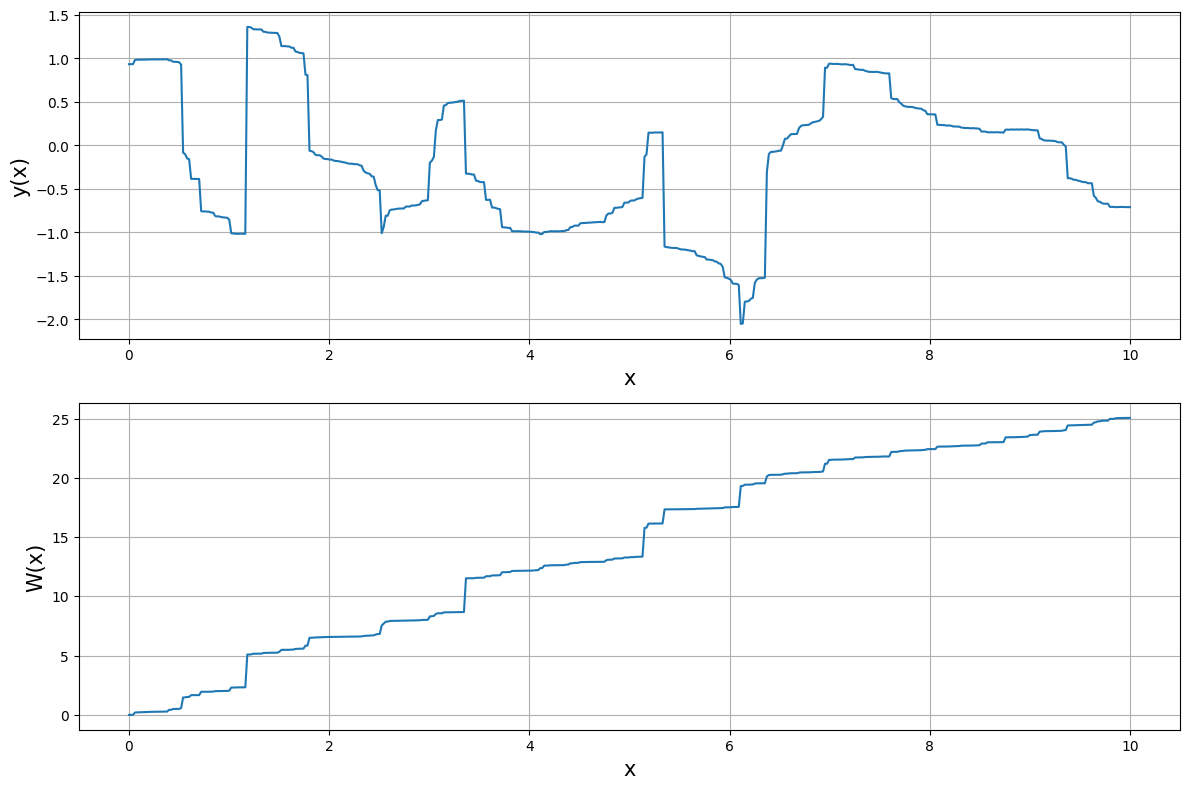

In [2]:
# Set Parameters
t1 = 0.0
t2 = 10.0

num_obs = 500 # (N) number of points e.g. size of data set
num_epochs = 2000
subordinator_truncation = 0.0
kappa = 0.5#0.2
delta = 2.1#1.2
gamma = 1.25#0.3
nProcesses = 1
l = 1

initial_sub = TemperedStableSubordinator(t1, t2, num_obs, num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
X = initial_sub
Y = GaussianProcess(initial_sub, 1, num_obs).reshape(-1,1)

Xs = np.linspace(0.0, 10.0, num_obs).reshape(-1, 1)

fig, ax = plt.subplots(nrows=2, figsize=(12,8))

ax[0].plot(Xs, Y)
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('y(x)', fontsize=15)
ax[0].grid(True)

ax[1].plot(Xs, initial_sub)
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('W(x)', fontsize=15)
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [3]:
# Log--likelihood function

def log_likelihood(X, Y):
    kernel = GPy.kern.RBF(input_dim=1)
    sub_kernel = GPy.kern.Brownian(input_dim=1)
    model = GPy.models.GPRegression(X, Y, kernel*sub_kernel)
    log_likelihood = model.log_likelihood()
    return log_likelihood

num_iter = 5000
burn_in = 0

Acceptance rate: 0.94 %
Number of accepted likelihood samples: 47
Accepted Likelihood samples: [-538.0972724418381, -535.0808177853, -533.6073860238874, -534.6974443031836, -527.3691539377777, -526.5038493202403, -527.6751439745954, -527.6964271370884, -527.2526189338332, -527.4135939110032, -526.57951048174, -525.6307700065394, -524.5386809016592, -525.0354072019034, -523.0581962053096, -523.9005098056176, -525.0151432487609, -524.6023773703271, -529.2648706564632, -529.3227408498791, -529.3555358828389, -528.6981801386429, -528.439520996093, -529.1921157806411, -524.1416445255642, -525.8468092004023, -525.8148279256203, -525.4342757859913, -528.5558235315059, -526.8827275776297, -528.2220819774335, -530.2126355598293, -529.6777536218353, -530.6049070994, -529.6112641614747, -527.1867001921233, -526.3358611184931, -526.2617527118771, -526.5201368591997, -526.6538893172253, -527.356240881771, -526.7965115113985, -526.8222810989179, -524.8959739968843, -524.3909124006298, -525.333496864

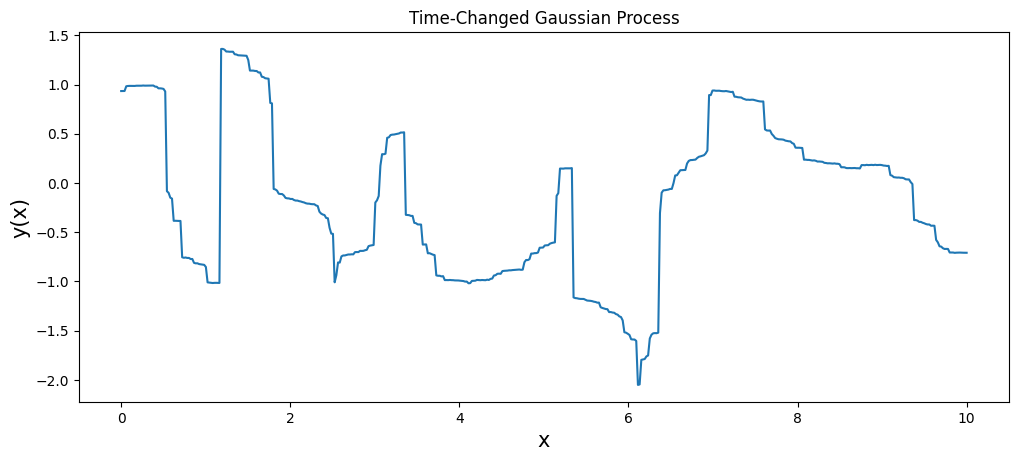

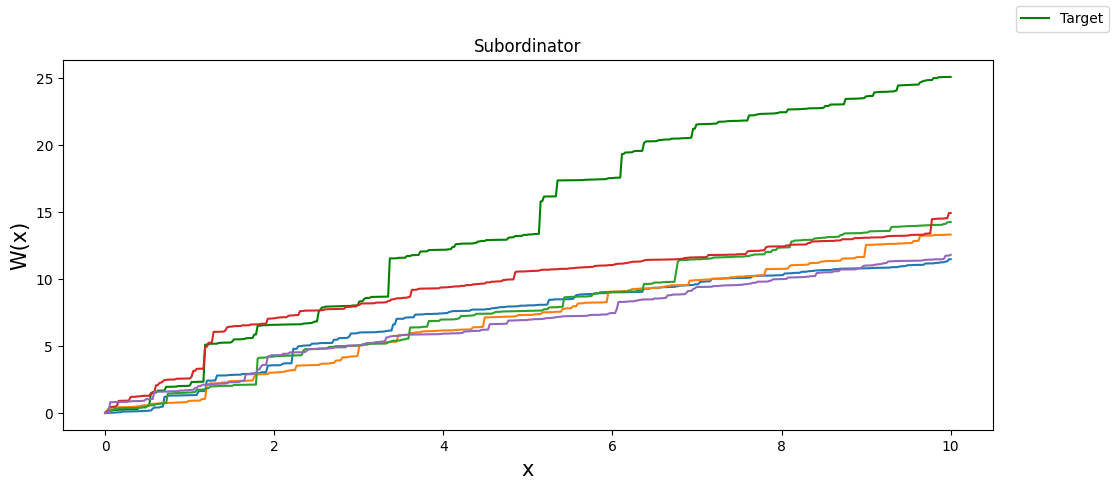

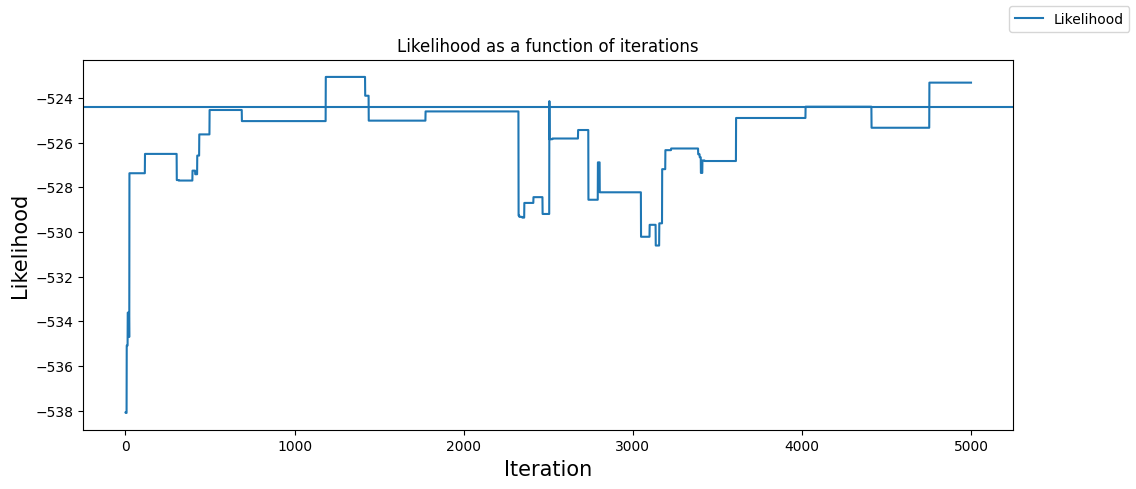

In [4]:
# Overall RUN

# Run the Metropolis-Hastings algorithm



t1 = 0.0
t2 = 10.0

N = 1

current_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
acceptances = 0

accept_sub_samples = []

likelihood_samples = []
accept_likelihood_samples = []

alphas = []
accept_alphas = []


for i in range(num_iter):
    # Draw a new proposal from the proposal distribution
#     print('Iteration:', i+1)

    new_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
    log_alpha = log_likelihood(new_sub, Y) - log_likelihood(current_sub, Y)
    alpha = np.exp(log_alpha)

    accept = np.random.uniform() < alpha
    alphas.append(alpha)

    if accept:
        current_sub = new_sub

        acceptances += 1

        accept_likelihood_samples.append(log_likelihood(current_sub, Y))

        accept_alphas.append(alpha)

        accept_sub_samples.append(current_sub)

    likelihood_samples.append(log_likelihood(current_sub, Y))


# Print the acceptance rate
print('Acceptance rate:', acceptances*100 / num_iter, '%')
print('Number of accepted likelihood samples:', acceptances)
print('Accepted Likelihood samples:', accept_likelihood_samples)
print('Accepted Alphas:', accept_alphas)
print(log_likelihood(X, Y))

Xs = np.linspace(0, 10, int(num_obs/N))

plt.figure(1).set_figwidth(12)
plt.xlabel('x', fontsize=15)
plt.ylabel('y(x)', fontsize=15)
plt.title('Time-Changed Gaussian Process')
plt.plot(Xs, Y)

plt.figure(2).set_figwidth(12)
plt.plot(Xs, initial_sub, label='Target', color='green')
for i in range(1,6):
        plt.plot(Xs, accept_sub_samples[-i])#, label='Best', color='red')
plt.title('Subordinator')
plt.xlabel('x', fontsize=15)
plt.ylabel('W(x)', fontsize=15)
plt.figure(2).legend()

plt.figure(3).set_figwidth(12)
plt.plot(np.linspace(1, len(likelihood_samples), len(likelihood_samples)), likelihood_samples, label='Likelihood')
plt.axhline(log_likelihood(X, Y))
plt.title('Likelihood as a function of iterations')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Likelihood', fontsize=15)
plt.figure(3).legend()


plt.show()



In [5]:
def jump_density_estimate(x_grid, locations, magnitudes):
    def weighted_Gaussian_kernel(x, mu, sigma, weight):
        u = (x - mu) / abs(sigma)
        y = (1 / (np.sqrt(2 * np.pi) * abs(sigma))) * np.exp(-u * u / 2) * weight
        return y
    prob = [weighted_Gaussian_kernel(x_i, locations, 0.001, magnitudes) for x_i in x_grid]
    density = [np.average(pr) for pr in prob]
    return np.array(density)

In [6]:
# Displaying only jumps and their location of the subordinators
# Green is the inital or target
# Red is the subordinator proposed by the algorithm

X_jump = []
Y_jump = []
X1_jump= []
Y1_jump= []
X2_jump= []
Y2_jump= []
X3_jump= []
Y3_jump= []
X4_jump= []
Y4_jump= []
X5_jump= []
Y5_jump= []

length = len(initial_sub)

for i in range(length-1):
    difference = 0.01
    if initial_sub[i+1] - initial_sub[i] > difference:
        X_jump.append(Xs[i])
        Y_jump.append((initial_sub[i+1] - initial_sub[i])[0])
    if accept_sub_samples[-1][i+1] - accept_sub_samples[-1][i] > difference:
        X1_jump.append(Xs[i])
        Y1_jump.append((accept_sub_samples[-1][i+1] - accept_sub_samples[-1][i])[0])
    if accept_sub_samples[-2][i+1] - accept_sub_samples[-2][i] > difference:
        X2_jump.append(Xs[i])
        Y2_jump.append((accept_sub_samples[-2][i+1] - accept_sub_samples[-2][i])[0])
    if accept_sub_samples[-3][i+1] - accept_sub_samples[-3][i] > difference:
        X3_jump.append(Xs[i])
        Y3_jump.append((accept_sub_samples[-3][i+1] - accept_sub_samples[-3][i])[0])
    if accept_sub_samples[-4][i+1] - accept_sub_samples[-4][i] > difference:
        X4_jump.append(Xs[i])
        Y4_jump.append((accept_sub_samples[-4][i+1] - accept_sub_samples[-4][i])[0])
    if accept_sub_samples[-5][i+1] - accept_sub_samples[-5][i] > difference:
        X5_jump.append(Xs[i])
        Y5_jump.append((accept_sub_samples[-5][i+1] - accept_sub_samples[-5][i])[0])

#Y_jump = [1]*len(X_jump)
#Y1_jump= [0.5]*len(X1_jump)

#print(Y_jump)
#plt.figure(3).set_figwidth(20)
#plt.bar(X_jump,Y_jump, width = 0.05)
#plt.bar(X1_jump,Y1_jump, width = 0.02, color='black')
#plt.xlabel('Jump Location')
#plt.ylabel('Jump Height')
#plt.figure(3).legend()

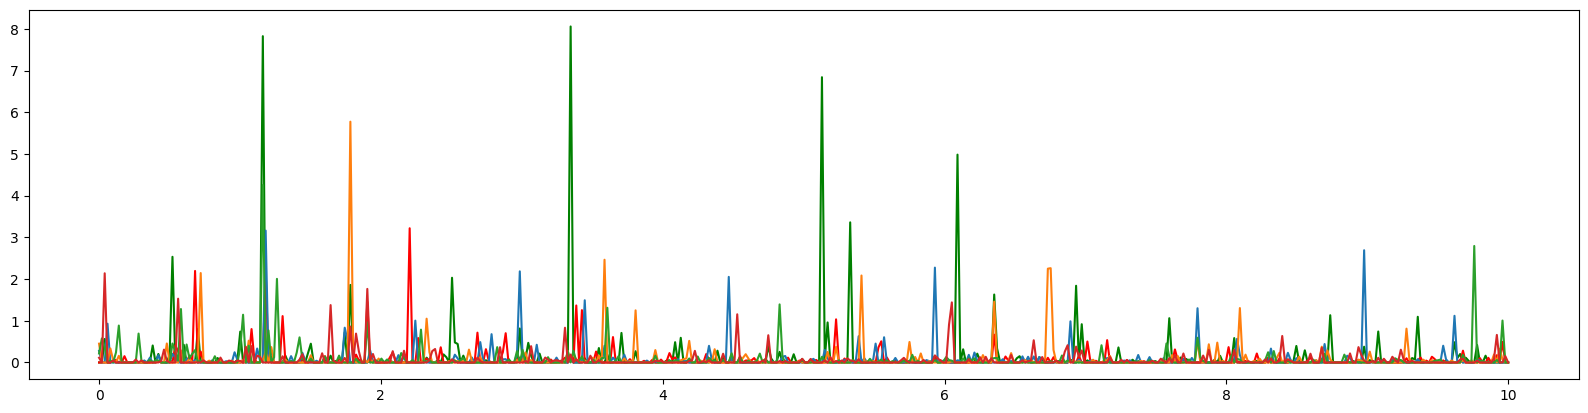

In [7]:
plt.figure().set_figwidth(20)
plt.plot(np.linspace(0, 10, 500), jump_density_estimate(np.linspace(0, 10, 500), X_jump, Y_jump), color='green')
plt.plot(np.linspace(0, 10, 500), jump_density_estimate(np.linspace(0, 10, 500), X1_jump, Y1_jump), color='red')
plt.plot(np.linspace(0, 10, 500), jump_density_estimate(np.linspace(0, 10, 500), X2_jump, Y2_jump))
plt.plot(np.linspace(0, 10, 500), jump_density_estimate(np.linspace(0, 10, 500), X3_jump, Y3_jump))
plt.plot(np.linspace(0, 10, 500), jump_density_estimate(np.linspace(0, 10, 500), X4_jump, Y4_jump))
plt.plot(np.linspace(0, 10, 500), jump_density_estimate(np.linspace(0, 10, 500), X5_jump, Y5_jump))
#plt.yscale('log')

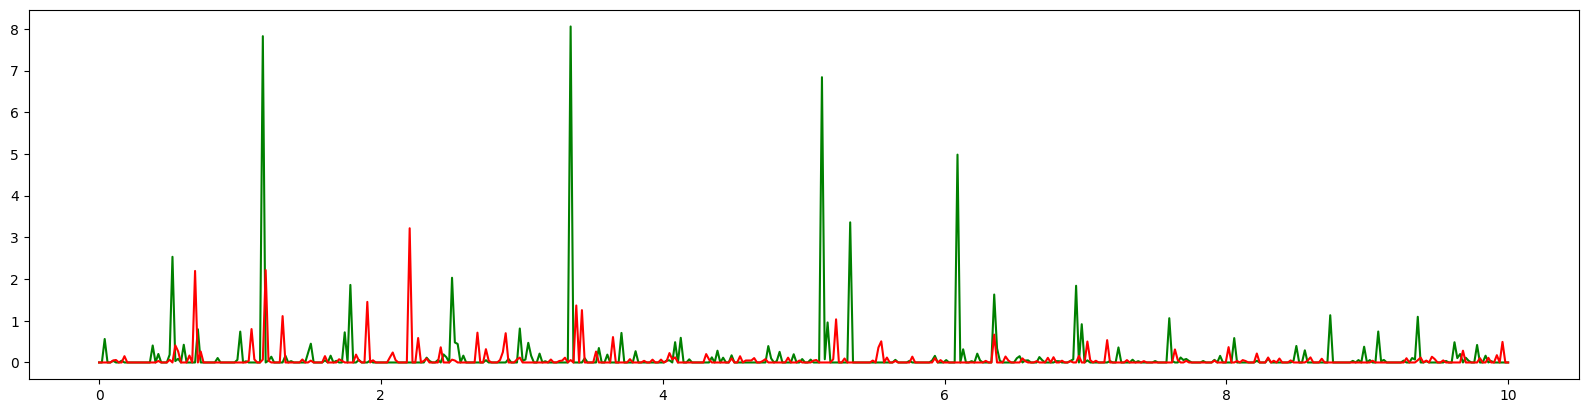

In [8]:
plt.figure().set_figwidth(20)
plt.plot(np.linspace(0, 10, 500), jump_density_estimate(np.linspace(0, 10, 500), X_jump, Y_jump), color='green')
plt.plot(np.linspace(0, 10, 500), jump_density_estimate(np.linspace(0, 10, 500), X1_jump, Y1_jump), color='red')
#plt.yscale('log')

In [25]:
type(Y_jump)
print(Y_jump)
print(abs(np.log10(Y3_jump)))

[0.48902618851479684, 195.0643911956929, 0.012407384554194323, 116.31931179943703, 0.18074150558948077, 0.03516360218850423, 0.9377686170252559, 0.5205887611137427, 0.2121298387065167, 0.15274785656231415, 0.0381673441681869, 1.15556416810972, 0.22626580671595775, 0.06406594926698972, 75.10188025087609, 18.388114918117367, 0.015242734561013549, 10.851876269564002, 10.885684725247529, 0.15488962225890646, 0.018160247534979135, 48.73521229522754, 0.017638109024176174, 0.7424460838168443, 0.6266687309561689, 0.011274268205056615, 79.95605635471776, 5.7338672796076935, 0.47994496087324023, 0.019596825953726693, 0.8900865932201896]
[]
